# Install detectron2

In [4]:
# install dependencies: 
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
# opencv is pre-installed on colab

1.8.1+cu111 True


In [5]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.8)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

In [6]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Run a pre-trained detectron2 model

We first download an image from the COCO dataset:

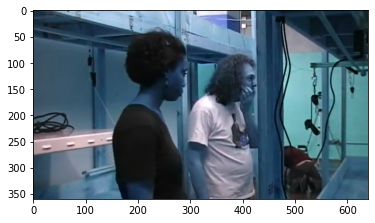

In [7]:
import cv2

im = cv2.imread("./shot00032_13_RKF.png")
plt.imshow(im)
plt.show()

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [20]:
def store_classe_sketch_from_box(image, video_id, keyframe_id):
    detectron2_img = cv2.imread(image)
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
    # Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
    predictor = DefaultPredictor(cfg)
    outputs = predictor(detectron2_img)

    classes = outputs["instances"].pred_classes.cpu().numpy()
    boxes = outputs["instances"].pred_boxes.tensor.cpu().numpy()
    for data, box in zip(classes, boxes):
        print(data,box)
        num = data.item()
        print(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes[num])
        ###### cottontail db logic ######
        # store rgb, border boxes, keyframe id and video id in database
        

In [21]:
def get_all_filesname(path):
    files = os.listdir(path)
    return files

def get_keyframe_id(filename, video_id,path):
    video_path = filename.replace(f"{path}/home/keyframes_filtered/","")
    keyframe_path = video_path.replace(video_id,"")
    keyframe_id = keyframe_path.replace(f"shot_","").replace(f"_RKF.png","")
    return keyframe_id

# change this path according to your computer
path = "/run/user/1000/gvfs/dav:host=tal.diskstation.me,port=5006,ssl=true"


In [26]:
def run(path):
    video_filelist = sorted(get_all_filesname(f"{path}/home/keyframes_filtered"))
    for videonr in video_filelist:
        for filename in get_all_filesname(f"{path}/home/keyframes_filtered/{videonr}"):
            keyframe_id = videonr,get_keyframe_id(filename,videonr,path)
            image = f"{path}/home/keyframes_filtered/{videonr}/{filename}"
            store_classe_sketch_from_box(image, videonr, keyframe_id)
            break
        break

In [27]:
run(path)

0 [ 63.37377  64.75498 242.65062 360.     ]
person
0 [435.80518  97.26786 638.7579  356.1635 ]
person
72 [172.52145 118.6215  258.62708 281.30975]
refrigerator
